In [60]:
import numpy as np
import ROOT
import keras
from matplotlib import pyplot as plt

model = keras.models.load_model('models/phiDNN')

with open('data/processed/X_train.npy', 'rb') as f:
    X_train = np.load(f)
with open('data/processed/y_train.npy', 'rb') as f:
    y_train = np.load(f)
with open('data/processed/X_test.npy', 'rb') as f:
    X_test = np.load(f)
with open('data/processed/y_test.npy', 'rb') as f:
    y_test = np.load(f)

model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

474/474 [==============================] - 1s 1ms/step - loss: 0.2595 - accuracy: 0.9024 - auc: 0.9480


[0.2595212161540985, 0.9023777842521667, 0.9479615092277527]

In [61]:
y_pred = model.predict(X_test).T[0]

# bg_true, bg_pred, phi_true, phi_pred = X_test[y_test == 0], X_test[y_pred == 0], X_test[y_test == 1], X_test[y_pred == 1]
bg_true, bg_pred, phi_true, phi_pred = X_test[y_test == 0], X_test[y_pred <= 0.5], X_test[y_test == 1], X_test[y_pred > 0.5]
y_pred
# y_test

array([2.5856652e-05, 7.7387452e-02, 3.5812908e-01, ..., 3.2328528e-06,
       1.3533246e-12, 7.9736694e-08], dtype=float32)

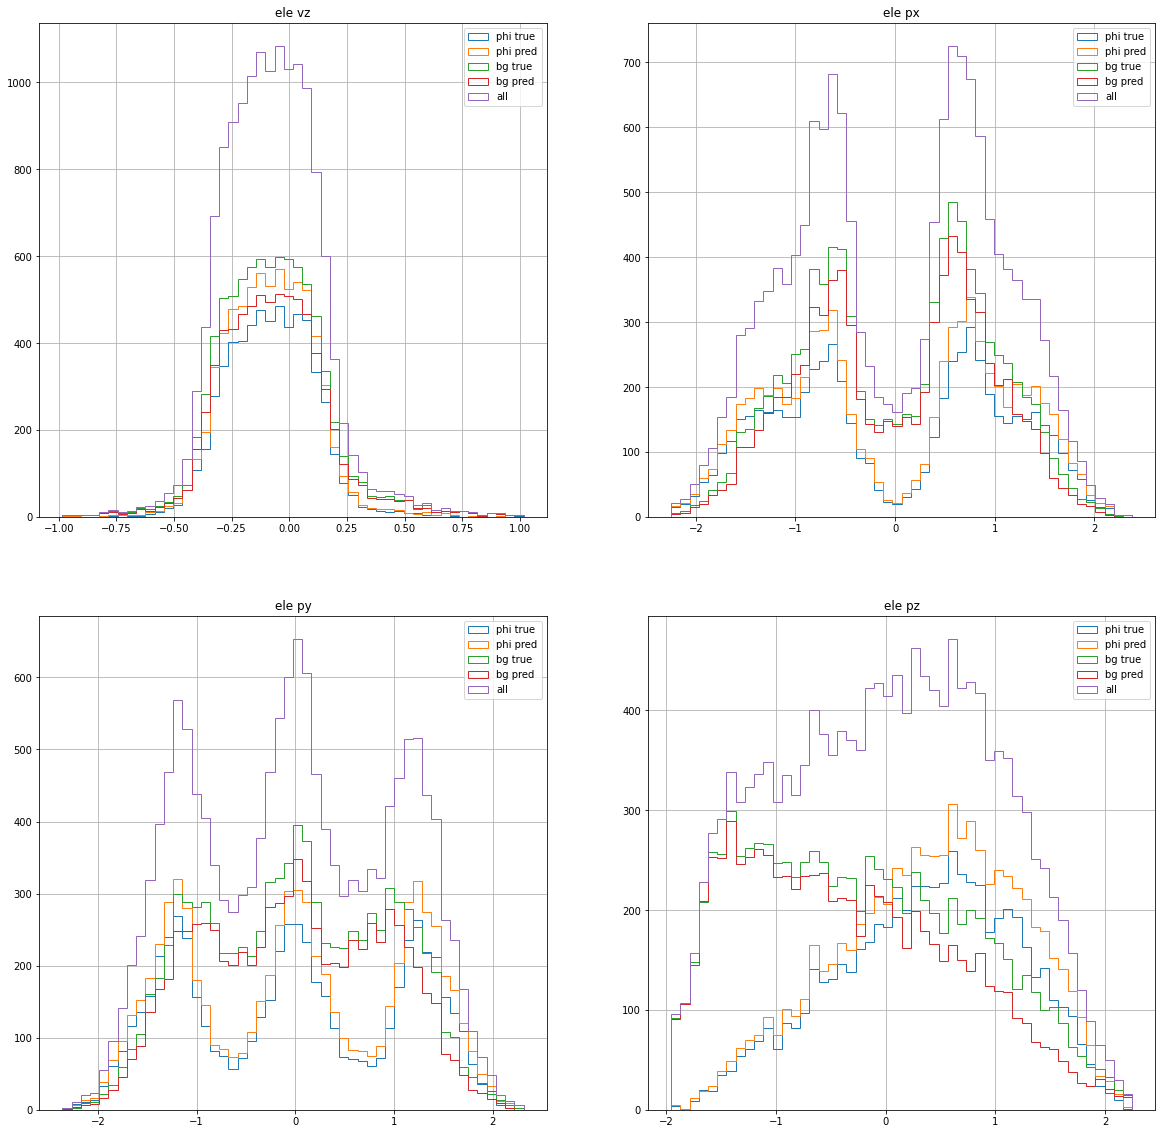

In [62]:
# Electron
bins=50
f, axs = plt.subplots(2, 2, figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["ele vz", "ele px", "ele py", "ele pz"][i])
    
    _, b, _  = ax.hist(phi_true[:, i], bins=bins, histtype="step", label="phi true");
    ax.hist(phi_pred[:, i], bins=b, histtype="step", label="phi pred");

    ax.hist(bg_true[:, i], bins=b, histtype="step", label="bg true");
    ax.hist(bg_pred[:, i], bins=b, histtype="step", label="bg pred");
    
    ax.hist(X_test[:, i], bins=b, histtype="step", label="all");

    ax.grid()
    ax.legend()
    # ax.set_yscale('log')


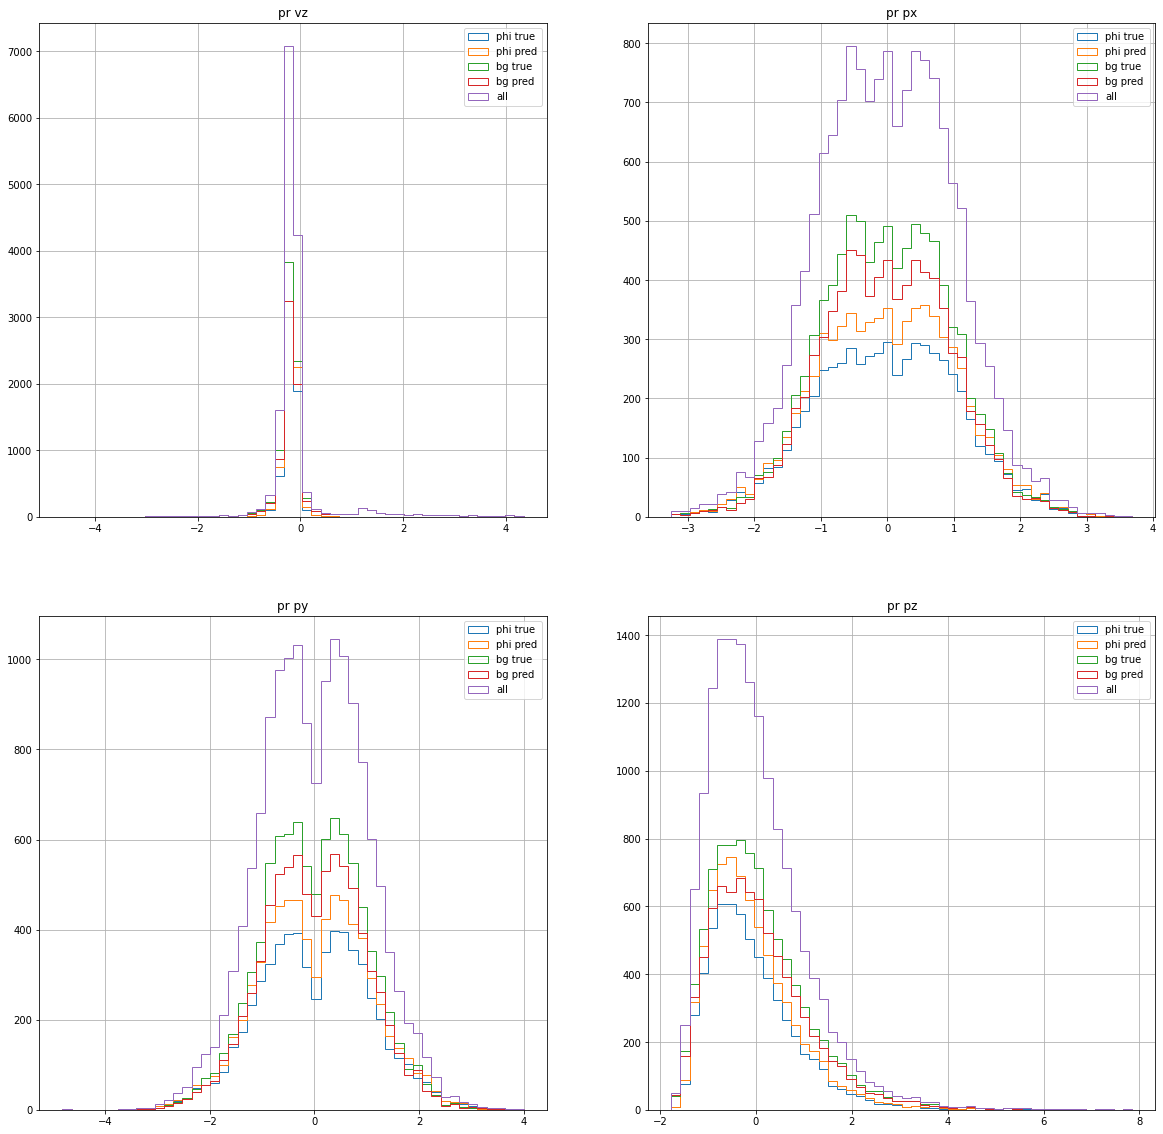

In [63]:
# Proton
f, axs = plt.subplots(2, 2, figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["pr vz", "pr px", "pr py", "pr pz"][i])
    
    i += 4
    _, b, _  = ax.hist(phi_true[:, i], bins=bins, histtype="step", label="phi true");    
    ax.hist(phi_pred[:, i], bins=b, histtype="step", label="phi pred");

    ax.hist(bg_true[:, i], bins=b, histtype="step", label="bg true");
    ax.hist(bg_pred[:, i], bins=b, histtype="step", label="bg pred");

    ax.hist(X_test[:, i], bins=b, histtype="step", label="all");
    
    ax.grid()
    ax.legend()
    # ax.set_yscale('log')

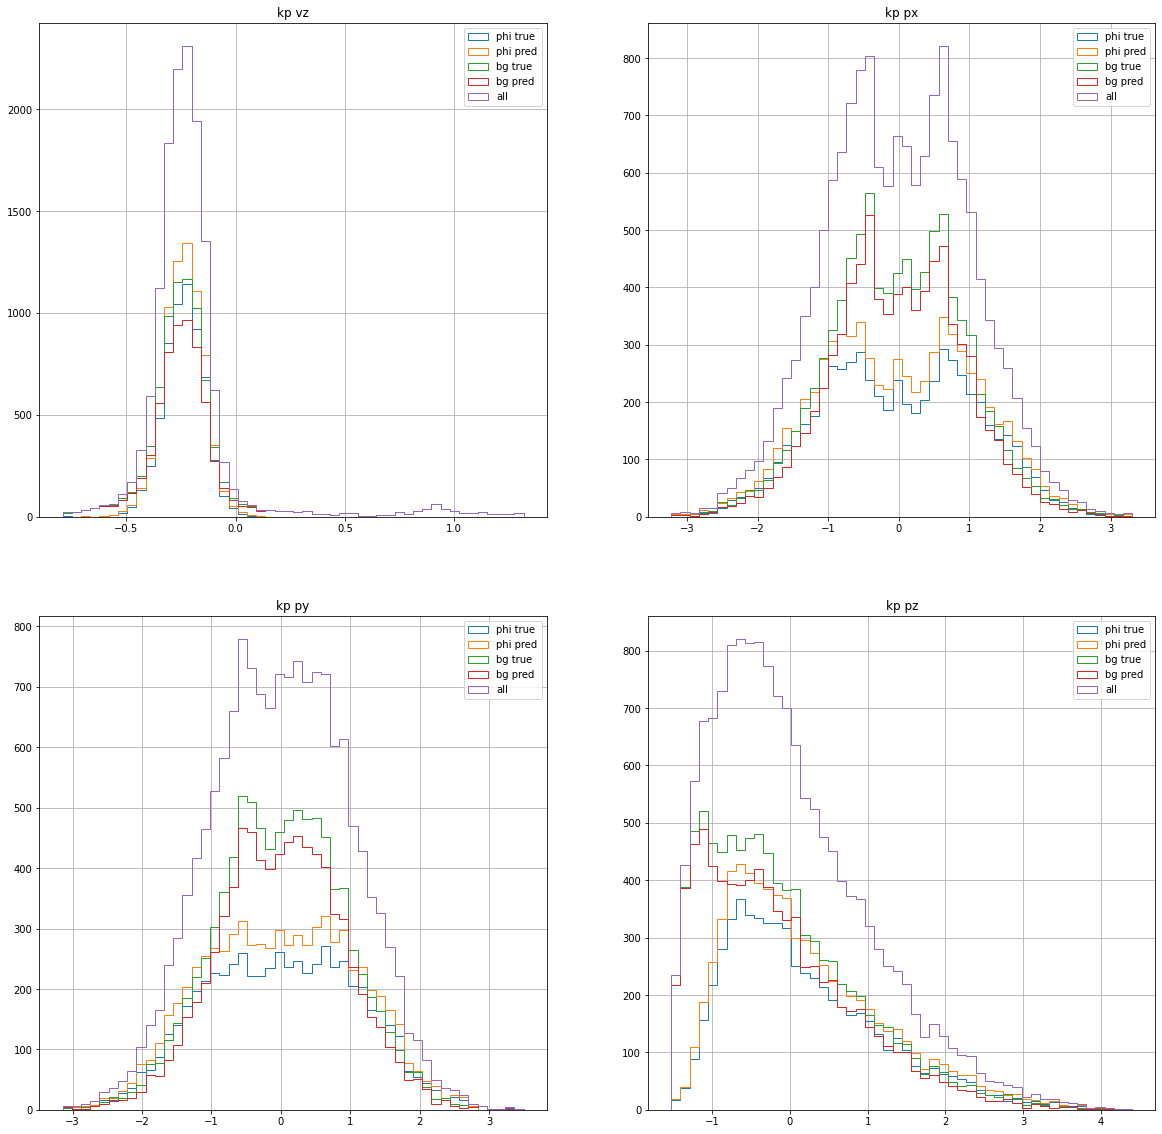

In [64]:
# Kaon Plus
f, axs = plt.subplots(2, 2, figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["kp vz", "kp px", "kp py", "kp pz"][i])

    i+=8
    
    _, b, _  = ax.hist(phi_true[:, i], bins=bins, histtype="step", label="phi true");
    ax.hist(phi_pred[:, i], bins=b, histtype="step", label="phi pred");

    ax.hist(bg_true[:, i], bins=b, histtype="step", label="bg true");
    ax.hist(bg_pred[:, i], bins=b, histtype="step", label="bg pred");
    
    ax.hist(X_test[:, i], bins=b, histtype="step", label="all");

    ax.grid()
    ax.legend()
    # ax.set_yscale('log')

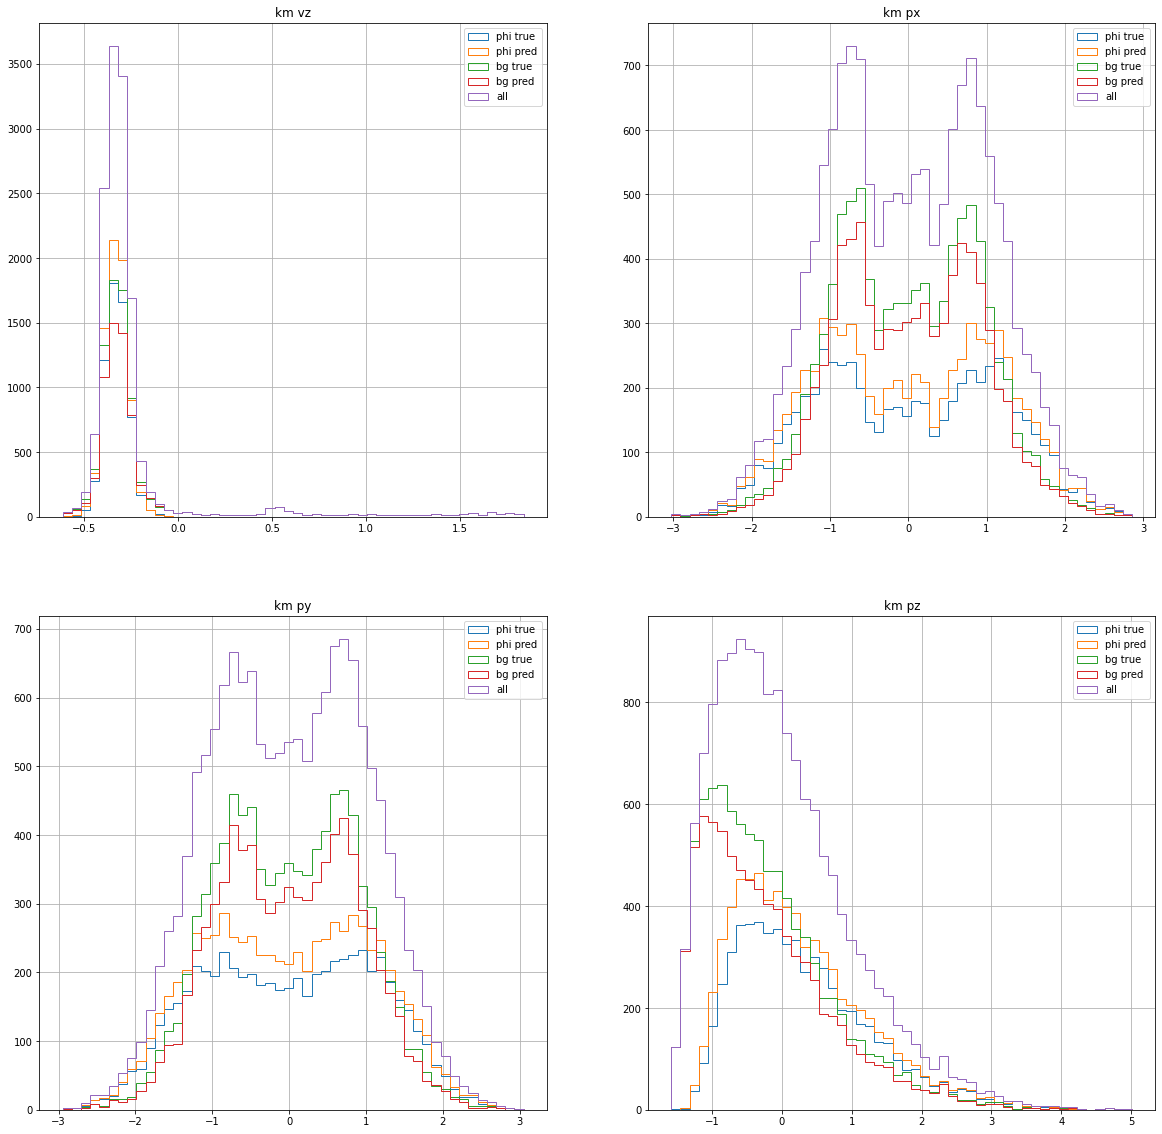

In [65]:
# Kaon Minus
f, axs = plt.subplots(2, 2, figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(["km vz", "km px", "km py", "km pz"][i])

    i+=12
    _, b, _  = ax.hist(phi_true[:, i], bins=bins, histtype="step", label="phi true");
    ax.hist(phi_pred[:, i], bins=b, histtype="step", label="phi pred");

    ax.hist(bg_true[:, i], bins=b, histtype="step", label="bg true");
    ax.hist(bg_pred[:, i], bins=b, histtype="step", label="bg pred");
    ax.hist(X_test[:, i], bins=b, histtype="step", label="all");
    
    ax.grid()
    ax.legend()
    # ax.set_yscale('log')